## Libraries

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import fnmatch
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from natsort import natsorted 
import shutil
print(tf.__version__)

2.10.0


## Images of the dataset

In [2]:
dir_path = r'PNG'
count_img = len(fnmatch.filter(os.listdir(dir_path + '/images'), '*.png*'))
count_msk = len(fnmatch.filter(os.listdir(dir_path + '/labels'), '*.png*'))
print('Image Count:', count_img)
print('Image Mask:', count_msk)

Image Count: 205
Image Mask: 205


## Distribution of Dataset

### General Distribution

<BarContainer object of 4 artists>

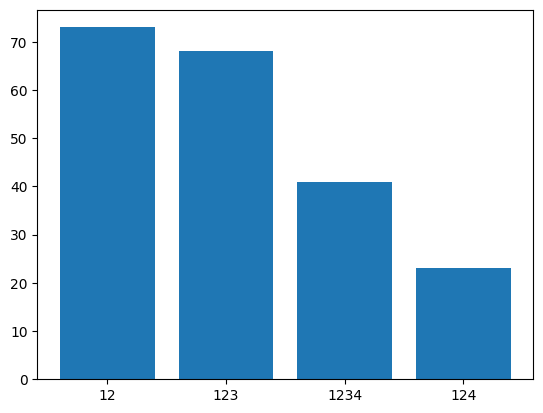

In [3]:
entries = []
masks = []
for mask_id in natsorted(os.listdir('PNG/labels/')):
    mask = PIL.Image.open(f'PNG/labels/{mask_id}')
    mask = np.array(mask)
    masks.append(mask)
    if (0 in mask) and (1 in mask) and (2 in mask) and (3 in mask) and (4 in mask):
        classes = '1234'
    elif (0 in mask) and (1 in mask) and (2 in mask) and (3 in mask):
        classes = '123'
    elif (0 in mask) and (1 in mask) and (2 in mask) and (4 in mask):
        classes = '124'
    elif (0 in mask) and (1 in mask) and (2 in mask):
        classes = '12'
    
    entry = {
        'id': mask_id.split(sep='.')[0],
        'class': classes
    }
    entries.append(entry)
df = pd.DataFrame(entries)#.to_csv('distribution.csv')
y = list(df['class'])
df = df['class'].value_counts().to_frame()
df['zones'] = df.index
plt.bar(df['zones'], df['class'])




### Stratified Split

In [4]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
sss.get_n_splits(masks, y)
for i, (train_index, test_index) in enumerate(sss.split(masks, y)):
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

  Train: index=[ 77 199  53  65  37 142  85 118  50 151 132 181  48  79 131 190 160  90
 192  96  78 104 135 108 126 100 102  95 110 130  42 122 179 202 170  47
  88 123  32 149 107 193 152  45  44  14  93 115  24 184 121  55 136  35
   1 167 180 109  10 138 125  63 114  72 143 139  49 194 129  69 147  81
 177  62 200 169  28  87 144  19   7 161 171  13 137 175 113 156  52 155
  80   2  21 158 195  31   8  86  75 105  38 165 127  60  82  94 185 197
   0 189   9  12 117 163  26 150 164 198  17 159  51 203 173 106  54 119
 140  40  98  76 101 182  23  56  59  41  16   5  22  15  74  97  18 166
 168  30  67  57 141 145  36  61 148 120  29  64  46 153  73  43 111 116
  89  58  11  71 178  34  68   6 187  70 191 204  92  83 124   3  20  99
 162 172 176 174]
  Test:  index=[146  66   4 103 188 133 201  33 183 134  27 128 157 154  91  84  25 186
  39 196 112]


### Training distribution

<BarContainer object of 4 artists>

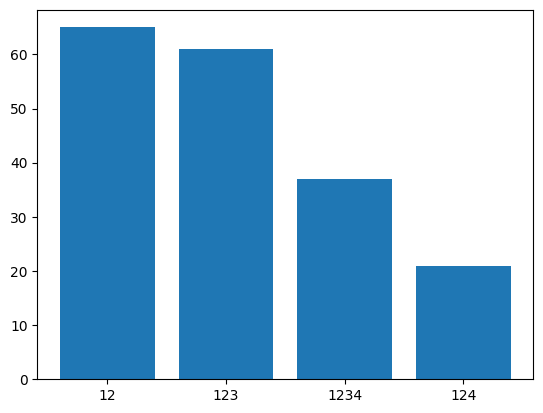

In [5]:
entries = []
masks = []
for mask_id in train_index:
    mask = PIL.Image.open(f'PNG/labels/{mask_id}.png')
    mask = np.array(mask)
    masks.append(mask)
    if (0 in mask) and (1 in mask) and (2 in mask) and (3 in mask) and (4 in mask):
        classes = '1234'
    elif (0 in mask) and (1 in mask) and (2 in mask) and (3 in mask):
        classes = '123'
    elif (0 in mask) and (1 in mask) and (2 in mask) and (4 in mask):
        classes = '124'
    elif (0 in mask) and (1 in mask) and (2 in mask):
        classes = '12'
    
    entry = {
        'id': mask_id,
        'class': classes
    }
    entries.append(entry)

    source_img = f'PNG/images/{mask_id}.png'
    destination_img = 'Train/images/{mask_id}.png'
    source_msk = f'PNG/labels/{mask_id}.png'
    destination_msk = f'Train/masks/{mask_id}.png'
    # copy only files
    if os.path.isfile(source_img) and os.path.isfile(source_msk):
        if not os.path.exists(destination_img):
            os.makedirs(destination_img)
        if not os.path.exists(destination_msk):
            os.makedirs(destination_msk)
        shutil.copy(source_img, destination_img)
        shutil.copy(source_msk, destination_msk)


df_train = pd.DataFrame(entries)#.to_csv('distribution_train.csv')
df_train = df_train['class'].value_counts().to_frame()
df_train['zones'] = df_train.index
plt.bar(df_train['zones'], df_train['class'])

### Testing distribution

<BarContainer object of 4 artists>

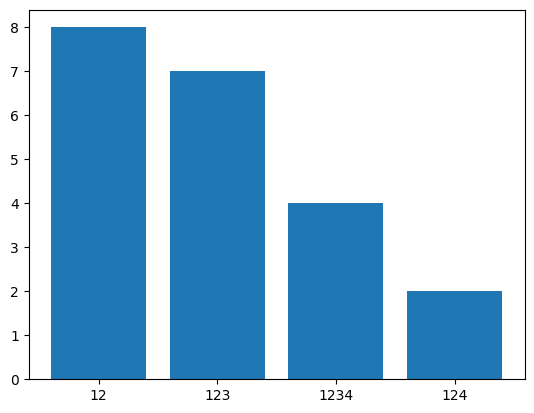

In [6]:
entries = []
masks = []
for mask_id in test_index:
    mask = PIL.Image.open(f'PNG/labels/{mask_id}.png')
    mask = np.array(mask)
    masks.append(mask)
    if (0 in mask) and (1 in mask) and (2 in mask) and (3 in mask) and (4 in mask):
        classes = '1234'
    elif (0 in mask) and (1 in mask) and (2 in mask) and (3 in mask):
        classes = '123'
    elif (0 in mask) and (1 in mask) and (2 in mask) and (4 in mask):
        classes = '124'
    elif (0 in mask) and (1 in mask) and (2 in mask):
        classes = '12'
    
    entry = {
        'id': mask_id,
        'class': classes
    }
    entries.append(entry)

    source_img = f'PNG/images/{mask_id}.png'
    destination_img = f'Test/images/{mask_id}.png'
    source_msk = f'PNG/labels/{mask_id}.png'
    destination_msk = f'Test/masks/{mask_id}.png'
    # copy only files
    if os.path.isfile(source_img) and os.path.isfile(source_msk):
        if not os.path.exists(destination_img):
            os.makedirs(destination_img)
        if not os.path.exists(destination_msk):
            os.makedirs(destination_msk)
        shutil.copy(source_img, destination_img)
        shutil.copy(source_msk, destination_msk)


df_test = pd.DataFrame(entries)#.to_csv('distribution_test.csv')
df_test = df_test['class'].value_counts().to_frame()
df_test['zones'] = df_test.index
# df_dist.plot.bar(x='zones', y='class', rot=0)
# print(df_dist)
plt.bar(df_test['zones'], df_test['class'])

### Distribution subplot

Text(0.5, 0, 'Zones Combination')

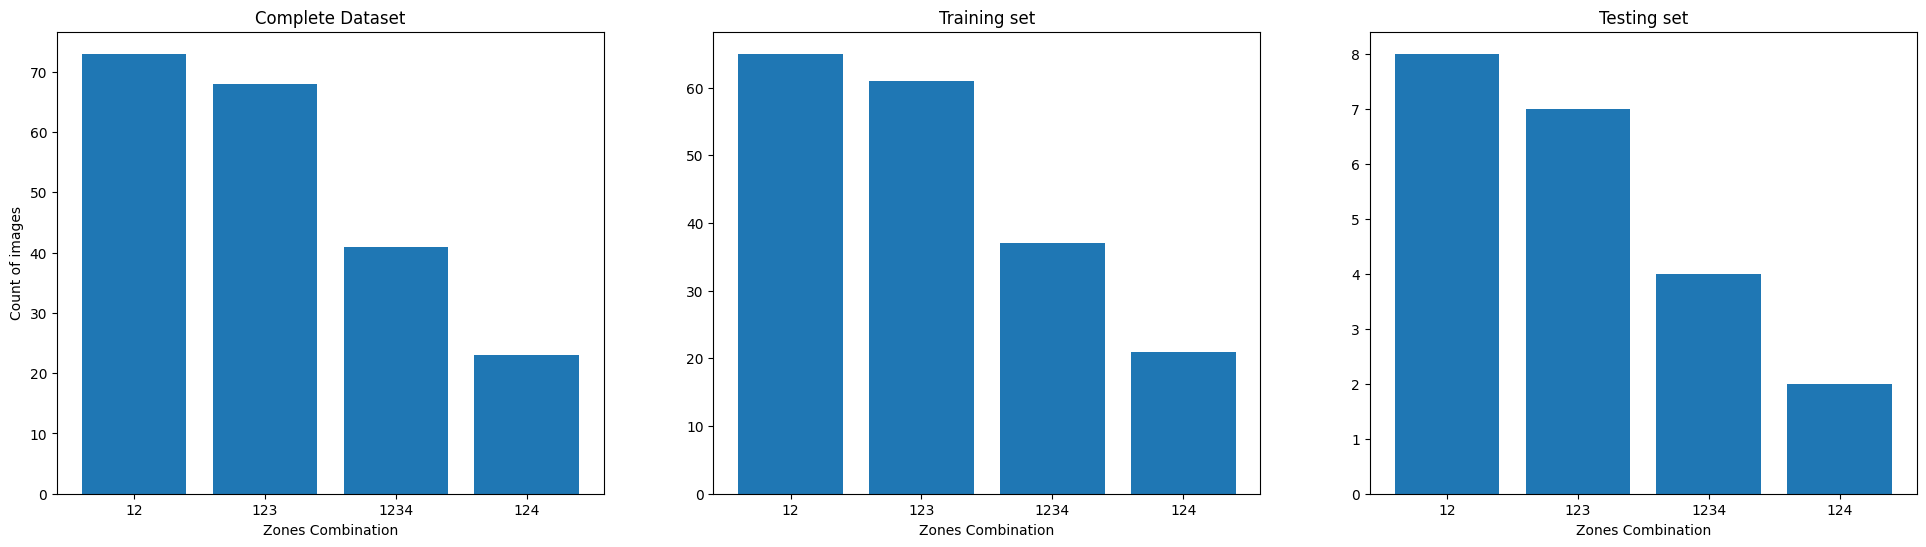

In [9]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
plt.bar(df['zones'], df['class'])
plt.ylabel('Count of images')
plt.xlabel('Zones Combination')
plt.title('Complete Dataset')
plt.subplot(1,3,2)
plt.bar(df_train['zones'], df_train['class'])
plt.title('Training set')
plt.xlabel('Zones Combination')
plt.subplot(1,3,3)
plt.bar(df_test['zones'], df_test['class'])
plt.title('Testing set')
plt.xlabel('Zones Combination')

## Create Dataset

In [11]:
BATCH_SIZE = None
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS=1
seed=42

10% of original dataset : Test. 10% of training set: Validation

In [13]:
# setting dictionary for the tf_data_dataset parameters
tf_Dataset_args=dict(labels=None,
                     label_mode=None,
                     batch_size=BATCH_SIZE,
                     image_size=(IMG_HEIGHT, IMG_WIDTH),
                     seed=seed,
                     color_mode="grayscale"
                     )
train_image_ds = tf.keras.utils.image_dataset_from_directory('Train\images',
                                                            # subset='training',
                                                            # validation_split=0.1,
                                                            **tf_Dataset_args
                                                            )
train_masks_ds = tf.keras.utils.image_dataset_from_directory('Train\masks',
                                                            # subset='training',
                                                            # validation_split=0.1,
                                                            **tf_Dataset_args
                                                            )


# val_image_ds = tf.keras.utils.image_dataset_from_directory('Train\images',
#                                                             subset='validation',
#                                                             # validation_split=0.1,
#                                                             **tf_Dataset_args
#                                                             )
# val_masks_ds = tf.keras.utils.image_dataset_from_directory('Train\masks',
#                                                             subset='validation',
#                                                             # validation_split=0.1,
#                                                             **tf_Dataset_args
#                                                             )


test_image_ds = tf.keras.utils.image_dataset_from_directory('Test\images',
                                                             **tf_Dataset_args
                                                             )
test_masks_ds = tf.keras.utils.image_dataset_from_directory('Test\masks',
                                                             **tf_Dataset_args
                                                             )

Found 184 files belonging to 1 classes.
Found 184 files belonging to 1 classes.
Found 21 files belonging to 1 classes.
Found 21 files belonging to 1 classes.


### Merge datasets

In [14]:
train_set=list(zip(train_image_ds, train_masks_ds))#
test_set=list(zip(test_image_ds, test_masks_ds))

train_data = tf.data.Dataset.from_tensor_slices((train_set))# Represents a potentially large set of elements.
test_data = tf.data.Dataset.from_tensor_slices((test_set))

### Plot example

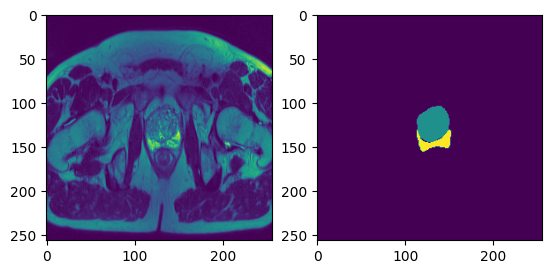

In [17]:
for i, j in test_data.take(1):
    plt.subplot(1,2,1)
    plt.imshow(i.numpy())
    plt.subplot(1,2,2)
    plt.imshow(j.numpy())

## Dataset with validation*

In [12]:
# setting dictionary for the tf_data_dataset parameters
tf_Dataset_args=dict(labels=None,
                     label_mode=None,
                     #validation_split=0.1,
                     batch_size=BATCH_SIZE,
                     image_size=(IMG_HEIGHT, IMG_WIDTH),
                     seed=seed,
                     color_mode="grayscale"
                     )

#---------- train image split train/val
# image_dataset_from_directory is a utility function of keras taht generates a tf.data.Dataset from image files in a directory.
# And tf.data.Dataset represents a potentially large set of elements.
train_image_ds = tf.keras.utils.image_dataset_from_directory('PNG\images',
                                                             subset="training",
                                                             **tf_Dataset_args
                                                             )

validation_image_ds = tf.keras.utils.image_dataset_from_directory('PNG\images',
                                                                  subset="validation",
                                                                  **tf_Dataset_args
                                                                  )
#----------- train masks split train/val
train_masks_ds = tf.keras.utils.image_dataset_from_directory('PNG\labels',
                                                             subset="training",
                                                             **tf_Dataset_args
                                                             )
validation_masks_ds = tf.keras.utils.image_dataset_from_directory('PNG\labels',
                                                                  subset="validation",
                                                                  **tf_Dataset_args
                                                                  )

Found 205 files belonging to 1 classes.
Using 185 files for training.
Found 205 files belonging to 1 classes.
Using 20 files for validation.
Found 205 files belonging to 1 classes.
Using 185 files for training.
Found 205 files belonging to 1 classes.
Using 20 files for validation.


In [14]:
train_set=list(zip(train_image_ds, train_masks_ds))#
validation_set=list(zip(validation_image_ds, validation_masks_ds))

training_data = tf.data.Dataset.from_tensor_slices((train_set))# Represents a potentially large set of elements.
validation_data = tf.data.Dataset.from_tensor_slices((validation_set))

In [21]:
print(validation_data)

<TensorSliceDataset element_spec=TensorSpec(shape=(2, 256, 256, 1), dtype=tf.float32, name=None)>


In [27]:
validation_data.save('PNG')

(256, 256, 1)


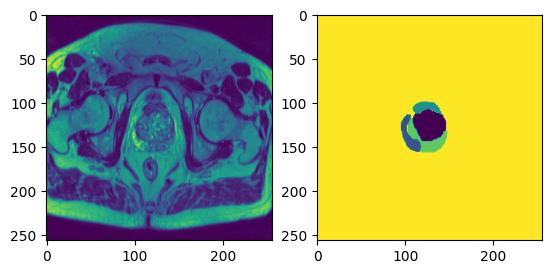

In [43]:
new_valset = tf.data.Dataset.load(r'PNG')
for i, j in new_valset.take(1):
    print(i.numpy().shape)
    plt.subplot(1,2,1)
    plt.imshow(i.numpy())
    plt.subplot(1,2,2)
    plt.imshow(j.numpy())